*Preliminary Analysis*

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('Dataset/data.xlsx',engine='openpyxl')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
n_rows,n_cols = df.shape
print(f'No of rows: {n_rows}')
print(f'No of columns: {n_cols}')

No of rows: 303
No of columns: 14


In [4]:
print('Columns in the DataFrame:')
print(df.columns.tolist())

Columns in the DataFrame:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [5]:
print('Datatype of each column')
print(df.dtypes)

Datatype of each column
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


*Finding missing values*

In [6]:
missing_values = df.isnull().sum()
print('Missing values in each column')
print(missing_values)

Missing values in each column
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
percentage_missingvalues = missing_values/n_rows * 100
print('Percentage of missing values in each column')
print(percentage_missingvalues)

Percentage of missing values in each column
age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


*Removing duplicated data*

In [8]:
duplicate_rows = df [ df.duplicated() ]
print('Duplicated rows')
print(duplicate_rows)

Duplicated rows
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [9]:
df.groupby(['target','sex']).size()

target  sex
0       0       24
        1      114
1       0       72
        1       93
dtype: int64

*Summary of men and women with and without CVD*

In [10]:
print('No of men and women with CVD')
n_women_negative,n_men_negative,n_women_positive,n_men_positive = df.groupby(['target','sex']).size()
print(f'No of women negative: {n_women_negative}')
print(f'No of men negative: {n_men_negative}')
print(f'No of women positive: {n_women_positive}')
print(f'No of men positive: {n_men_positive}')

No of men and women with CVD
No of women negative: 24
No of men negative: 114
No of women positive: 72
No of men positive: 93


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

*Histogram of the Dataset*

C:\Users\harig\AppData\Local\Temp\ipykernel_15744\395483414.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = fig.gca());


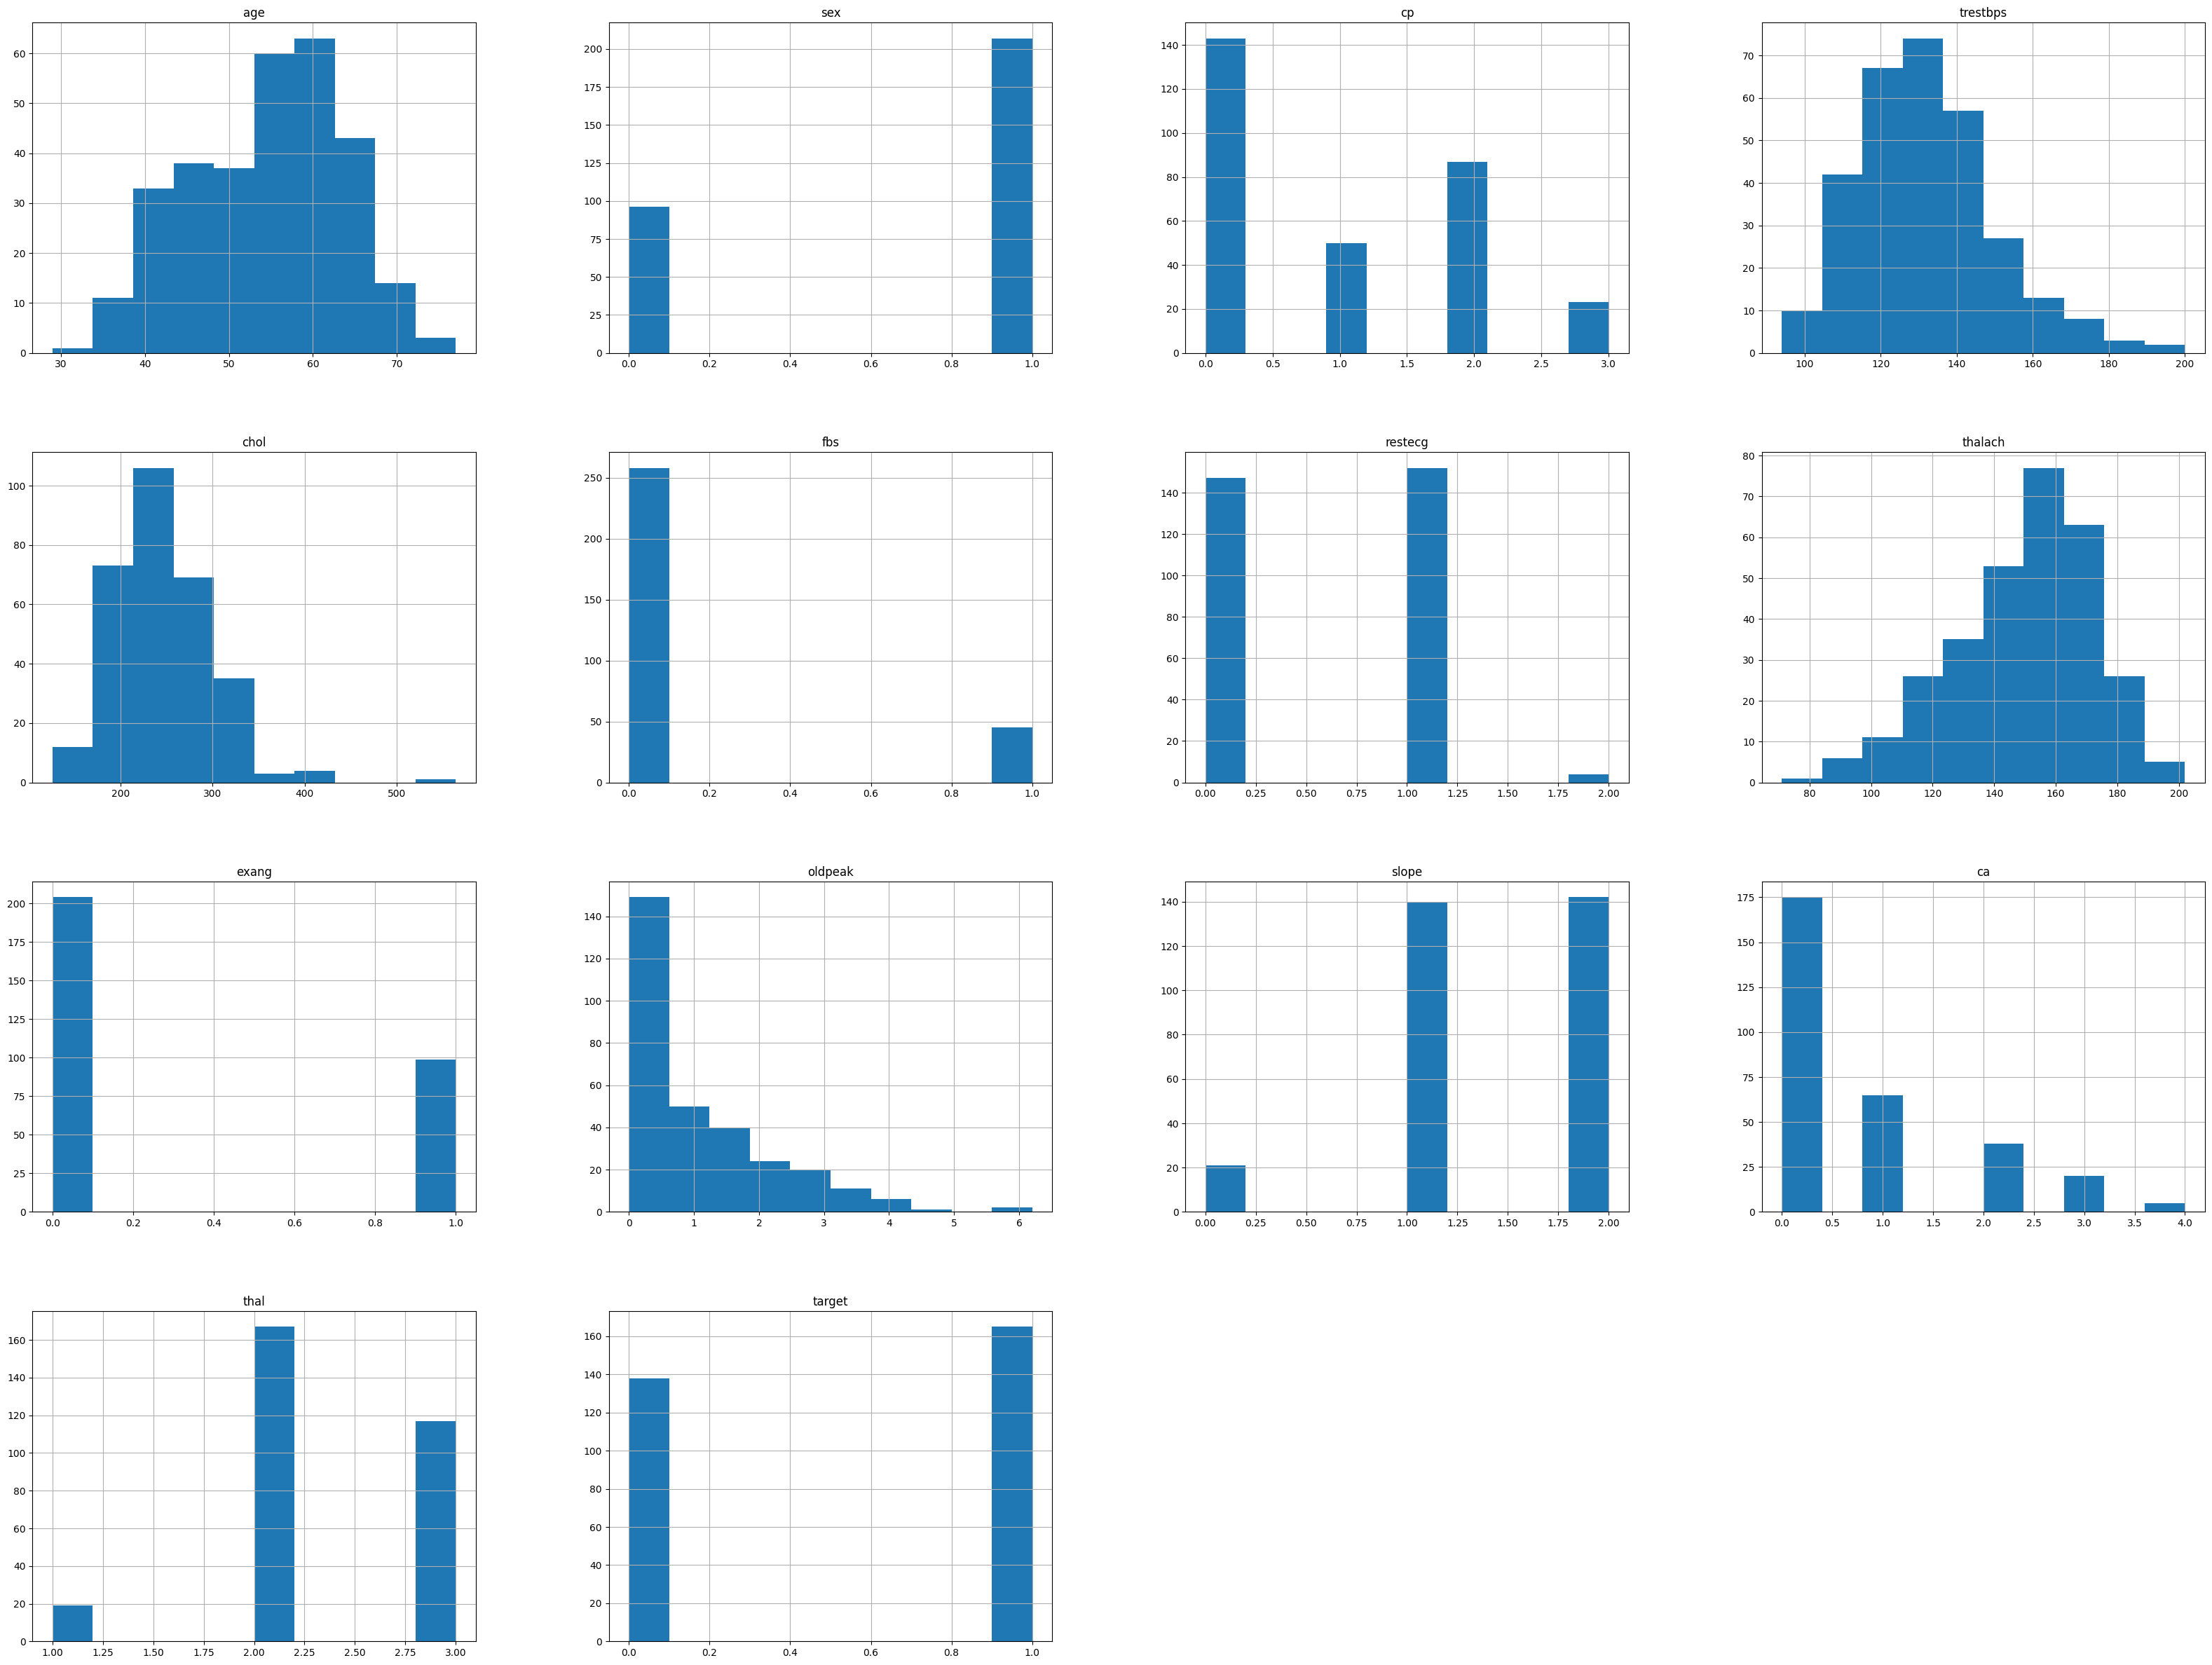

In [16]:
fig = plt.figure(figsize = (40,30))
df.hist(ax = fig.gca())

*Exploring categorical variables*

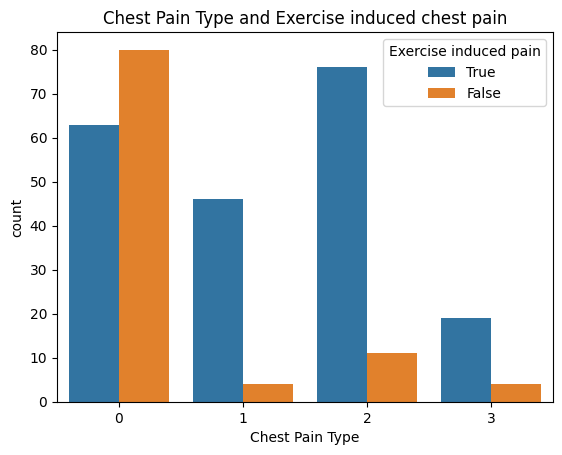

In [12]:
sns.countplot(df,x='cp',hue='exang')
plt.legend(title='Exercise induced pain',labels=['True','False'])
plt.title('Chest Pain Type and Exercise induced chest pain')
plt.xlabel('Chest Pain Type')
plt.show()

*No.of people with and without fasting blood sugar greater than 120mg/dl*

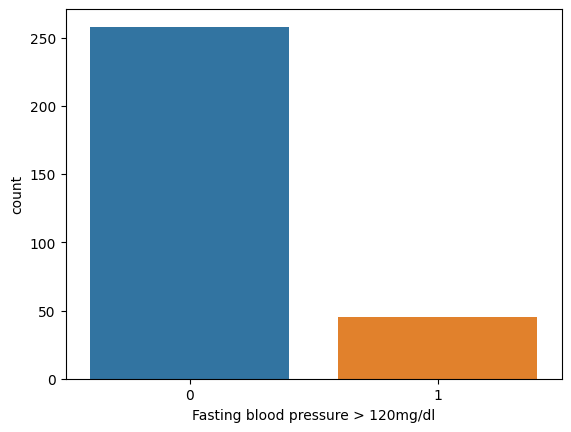

In [13]:
sns.countplot(df,x='fbs')
plt.xlabel('Fasting blood pressure > 120mg/dl')
plt.show()

*Composition of overall patients w.r.t Gender*

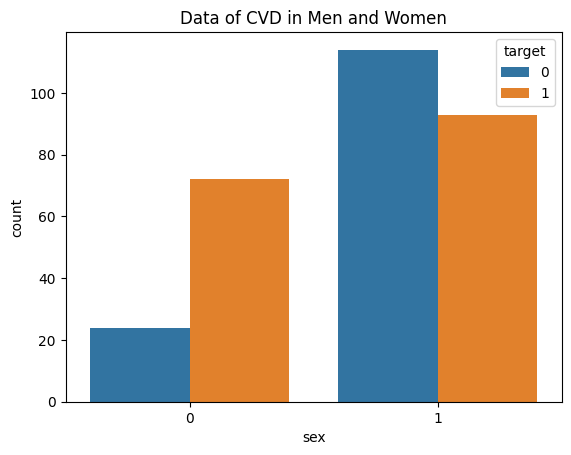

In [14]:
sns.countplot(df,x='sex',hue='target')
plt.title('Data of CVD in Men and Women')
plt.show()

*Occurance of CVD across age*

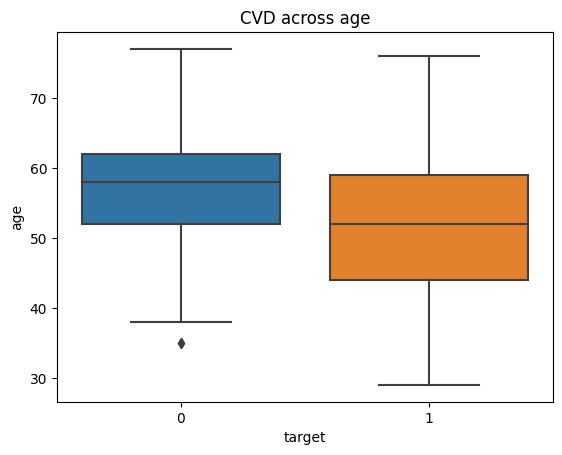

In [15]:
sns.boxplot(x='target',y='age',data=df)
plt.title('CVD across age')
plt.show()

*Observe the correlation between different features*

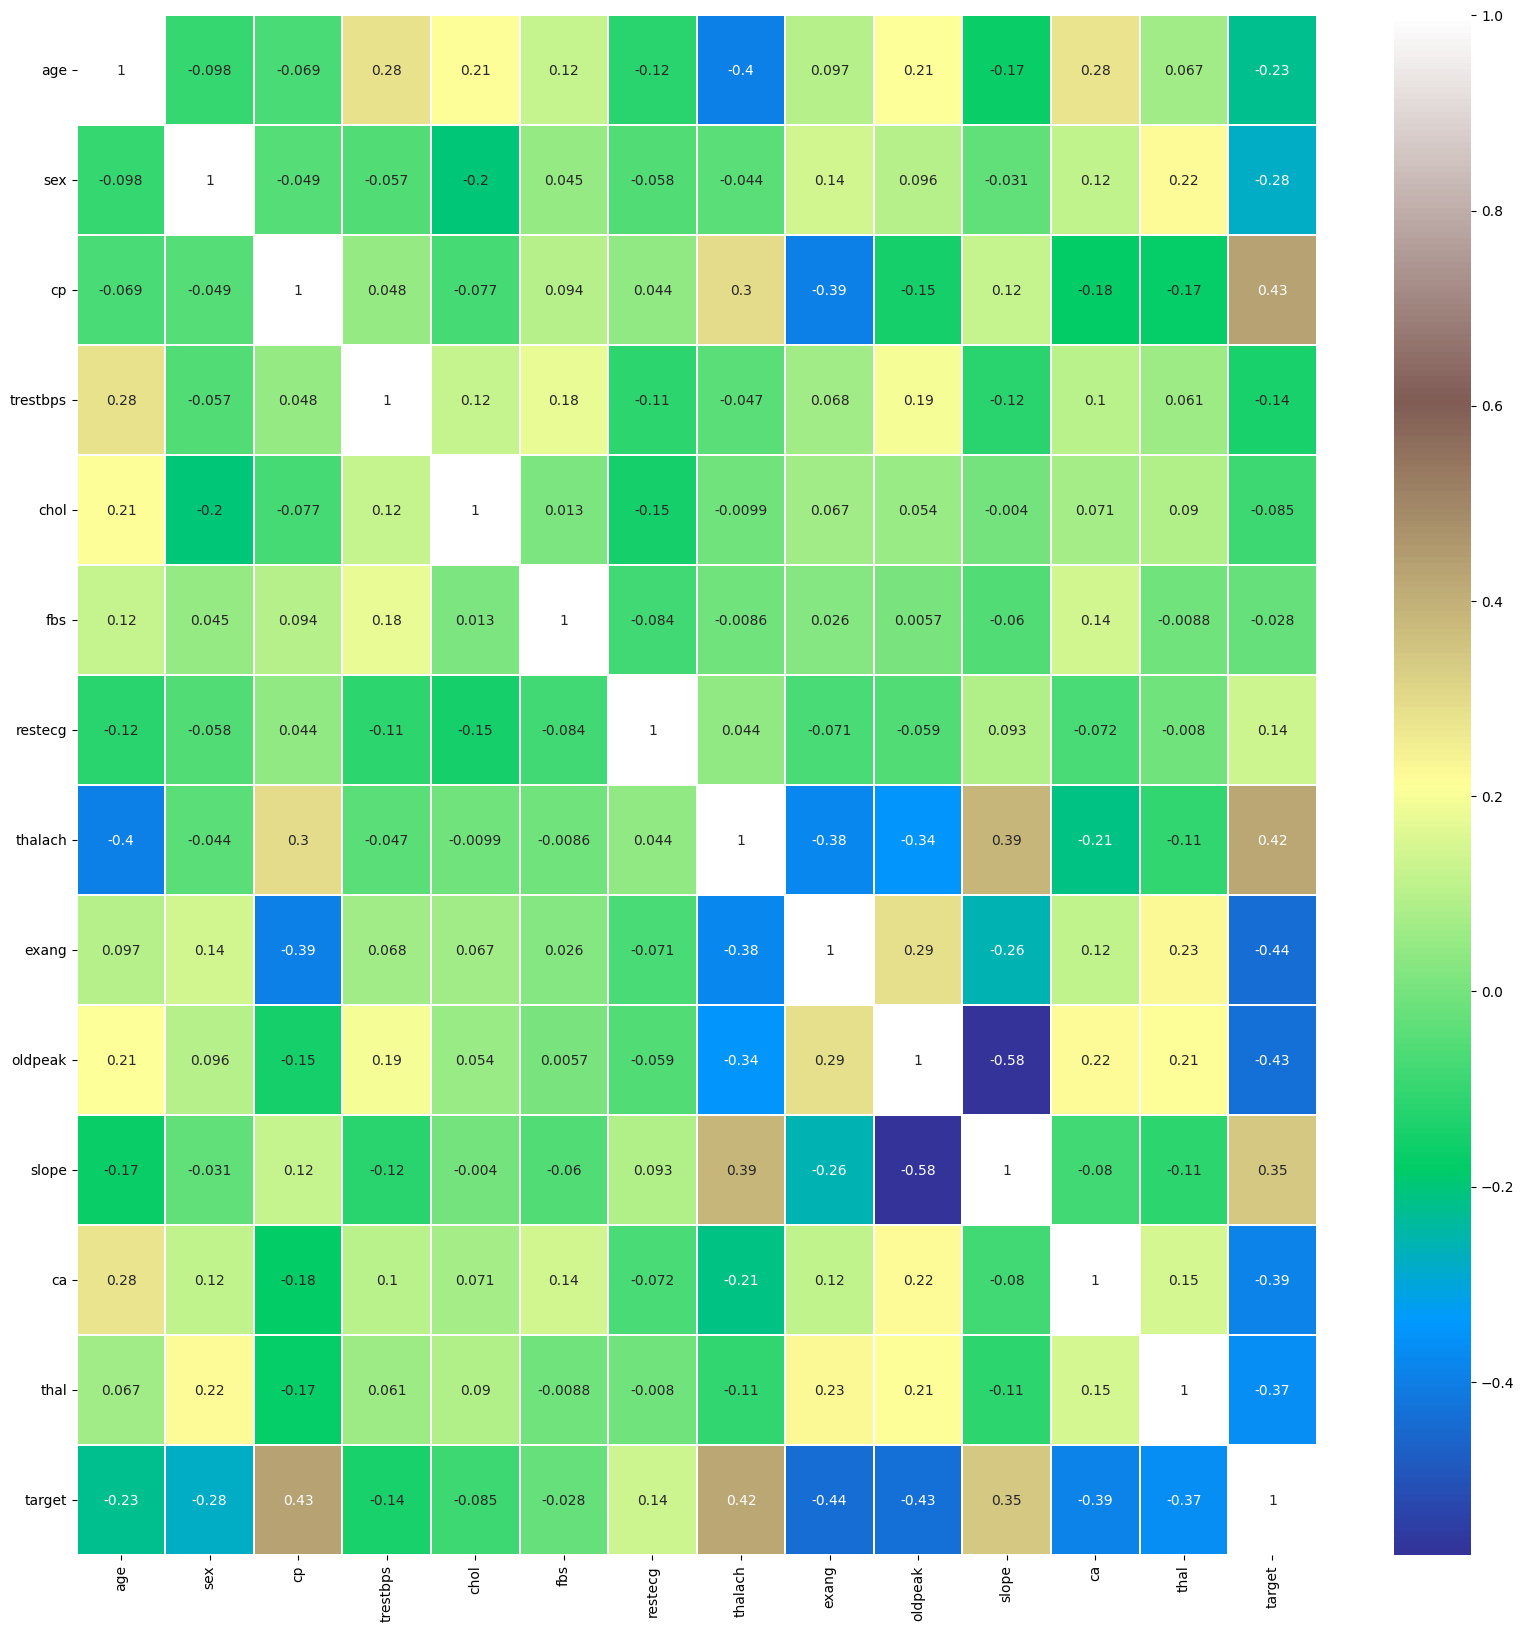

In [17]:
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

*From the above HeatMap, we can see that cp and thalach are the features with highest positive correlation*
*while exang, oldpeak and ca are negatively correlated.*
*Other features do not hold much correlation with the response variable "target".*

*Model to predict using Logistic Regression*

In [18]:
X = df.drop("target",axis=1)
y = df["target"]

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=7)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\harig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test, pred)

0.8032786885245902

In [24]:
accuracy_score(y_train, lr.predict(X_train))

0.8636363636363636

In [26]:
import warnings
import numpy as np
in_data = (57,0,0,140,241,0,1,123,1,0.2,1,0,3)

# Changing the input data into a numpy array
in_data_as_numpy_array = np.array(in_data)

# Reshaping the numpy array as we predict it
in_data_reshape = in_data_as_numpy_array.reshape(1,-1)
pred = lr.predict(in_data_reshape)
print(pred)

if(pred[0] == 0):
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

[0]
The person does not have heart disease.


C:\Users\harig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
